In [1]:
import healpy as hp
import pandas as pd
import numpy as np
import astropy
from astropy import units as u
from astropy.coordinates import SkyCoord
%matplotlib inline


In [2]:
patch = pd.read_csv("/home/rt2122/data/one_patch_p.csv", index_col='index')

In [3]:
print(patch.shape)
patch.head()

(320759, 25)


,id,objID,l,b,gPSFFlux,gPSFFluxErr,gKronFlux,gKronFluxErr,rPSFFlux,rPSFFluxErr,...,iKronFluxErr,zPSFFlux,zPSFFluxErr,zKronFlux,zKronFluxErr,yPSFFlux,yPSFFluxErr,yKronFlux,yKronFluxErr,pix
index,,,,,,,,,,,,,,,,,,,,,
0,0,187672181042172483,108.217485,47.747596,3.556950e-07,4.349380e-07,-999.000000,9.990000e+02,4.430870e-07,5.734870e-07,...,4.428020e-07,0.000004,9.685390e-07,-999.000000,999.000000,1.485010e-06,0.000002,-999.000000,999.000000,2.914554e+10
1,0,187672181283370219,108.204059,47.743701,1.082320e-05,4.329770e-07,0.000017,8.027050e-07,1.626730e-05,5.381050e-07,...,7.285690e-07,0.000020,1.099160e-06,0.000032,0.000002,2.346840e-05,0.000002,0.000032,0.000003,2.914554e+10
2,0,187662181196649123,108.207734,47.746415,1.322120e-06,3.966010e-07,-999.000000,9.990000e+02,4.234680e-07,5.407890e-07,...,4.063610e-07,0.000003,9.760390e-07,-999.000000,999.000000,-8.281200e-07,0.000002,-999.000000,999.000000,2.914554e+10
3,0,187672181215422012,108.208625,47.743965,7.719280e-06,4.263940e-07,0.000009,6.707270e-07,1.342360e-05,6.253580e-07,...,6.421820e-07,0.000020,9.953010e-07,0.000029,0.000002,2.430040e-05,0.000002,0.000032,0.000004,2.914554e+10
4,0,187672181135167904,108.216656,47.741807,1.685010e-06,4.597150e-07,-999.000000,9.990000e+02,3.643300e-06,5.087650e-07,...,1.129350e-06,0.000010,1.009070e-06,0.000013,0.000002,1.387760e-05,0.000002,0.000018,0.000003,2.914551e+10


In [35]:
duplicates = patch[patch.duplicated(subset=["l", "b"])]
duplicates.shape

(1195, 24)

In [36]:
coords = set([(l, b) for l, b in zip(duplicates["l"], duplicates["b"])])

In [37]:
coords = list(coords)
len(coords)

887

In [23]:
params = ['gPSFFlux', 'gKronFlux',  
          'rPSFFlux', 'rKronFlux',  
          'iPSFFlux', 'iKronFlux',  
          'zPSFFlux', 'zKronFlux', 
          'yPSFFlux', 'yKronFlux', ]

In [82]:
for l, b in coords:
    index = patch[np.logical_and(patch["l"] == l, patch["b"] == b)].index[0]
    cur_duplicates = duplicates[duplicates["l"] == l][duplicates["b"] == b]
    for p in params:
        err = patch.loc[index, p+'Err']
        min_err = min(cur_duplicates[p+'Err'])
        if err > min_err:
            val = cur_duplicates[cur_duplicates[p+'Err']==min_err][p].values[0]
            patch.loc[index, p] = val

265312
77736
8329
22705
55007


/home/rt2122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


64061
55010
107131
115141
115234
123730
241011
239670
63156
79859
29293
31234
99008
120608
138797
152079
178995
161109
270884
315900
286735
220005
15291
39575
115774
121163
133022
148766
151478
152361
157976
182880
28889
32970
32974
32977
32979
38266
53880
54531
54536
54540
23077
23372
64410
100736
1662
1668
307163
210976
269049
6262
28851
33243
33831
61777
72184
74342
74642
74645
78218
223611
314807
213162
242959
264942
215051
238918
258197
195059
242850
194296
108568
219335
173802
171656
188807
231147
143470
302576
294314
303679
31283
31939
31941
31944
37971
37976
38139
49983
57224
57279
54238
3395
6883
11520
11524
17584
212905
291708
318673
196327
228035
245322
28093
43251
14094
17904
3444
85001
101592
22175
47833
51776
68629
147486
153212
155307
169211
109732
120743
168754
233229
251085
162542
213845
262588
213990
16264
31715
47579
101844
103752
105807
105823
135146
135150
135930
181375
181383
202405
305706
236445
298307
169196
313559
153531
13717
25959
25962
82760
93304
93308
9331

In [71]:
for p in params:
    idx = patch[patch[p+'Err']==-999].index
    print(idx.shape)
    patch.loc[idx,p+'Err'] = 999

(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)


In [84]:
patch.drop_duplicates(subset=["l", "b"], keep='first', inplace=True)

In [85]:
patch.shape

(320759, 24)

In [86]:
patch['pix']=None

In [101]:
for i in range(100):
    patch.loc[[i],'pix'] = hp.ang2pix(theta=patch.iloc[i]["l"], phi=patch.iloc[i][ "b"], 
                                     nside=2**11, nest=True, lonlat=True)

In [102]:
patch.head()

,id,objID,l,b,gPSFFlux,gPSFFluxErr,gKronFlux,gKronFluxErr,rPSFFlux,rPSFFluxErr,...,iKronFluxErr,zPSFFlux,zPSFFluxErr,zKronFlux,zKronFluxErr,yPSFFlux,yPSFFluxErr,yKronFlux,yKronFluxErr,pix
0,0,187672181042172483,108.217485,47.747596,3.556950e-07,4.349380e-07,-999.000000,9.990000e+02,4.430870e-07,5.734870e-07,...,4.428020e-07,0.000004,9.685390e-07,-999.000000,999.000000,1.485010e-06,0.000002,-999.000000,999.000000,7115609
1,0,187672181283370219,108.204059,47.743701,1.082320e-05,4.329770e-07,0.000017,8.027050e-07,1.626730e-05,5.381050e-07,...,7.285690e-07,0.000020,1.099160e-06,0.000032,0.000002,2.346840e-05,0.000002,0.000032,0.000003,7115609
2,0,187662181196649123,108.207734,47.746415,1.322120e-06,3.966010e-07,-999.000000,9.990000e+02,4.234680e-07,5.407890e-07,...,4.063610e-07,0.000003,9.760390e-07,-999.000000,999.000000,-8.281200e-07,0.000002,-999.000000,999.000000,7115609
3,0,187672181215422012,108.208625,47.743965,7.719280e-06,4.263940e-07,0.000009,6.707270e-07,1.342360e-05,6.253580e-07,...,6.421820e-07,0.000020,9.953010e-07,0.000029,0.000002,2.430040e-05,0.000002,0.000032,0.000004,7115609
4,0,187672181135167904,108.216656,47.741807,1.685010e-06,4.597150e-07,-999.000000,9.990000e+02,3.643300e-06,5.087650e-07,...,1.129350e-06,0.000010,1.009070e-06,0.000013,0.000002,1.387760e-05,0.000002,0.000018,0.000003,7115603


In [9]:
from tqdm import tqdm_notebook

In [107]:
patch.index = range(patch.shape[0])

In [10]:
for i in tqdm_notebook(range(patch.shape[0])):
    patch.loc[[i],'pix'] = hp.ang2pix(theta=patch.iloc[i]["l"], phi=patch.iloc[i][ "b"], 
                                     nside=2**17, nest=True, lonlat=True)

In [11]:
patch.to_csv('/home/rt2122/data/one_patch_p.csv')

In [12]:
patch.head()

,id,objID,l,b,gPSFFlux,gPSFFluxErr,gKronFlux,gKronFluxErr,rPSFFlux,rPSFFluxErr,...,iKronFluxErr,zPSFFlux,zPSFFluxErr,zKronFlux,zKronFluxErr,yPSFFlux,yPSFFluxErr,yKronFlux,yKronFluxErr,pix
index,,,,,,,,,,,,,,,,,,,,,
0,0,187672181042172483,108.217485,47.747596,3.556950e-07,4.349380e-07,-999.000000,9.990000e+02,4.430870e-07,5.734870e-07,...,4.428020e-07,0.000004,9.685390e-07,-999.000000,999.000000,1.485010e-06,0.000002,-999.000000,999.000000,2.914554e+10
1,0,187672181283370219,108.204059,47.743701,1.082320e-05,4.329770e-07,0.000017,8.027050e-07,1.626730e-05,5.381050e-07,...,7.285690e-07,0.000020,1.099160e-06,0.000032,0.000002,2.346840e-05,0.000002,0.000032,0.000003,2.914554e+10
2,0,187662181196649123,108.207734,47.746415,1.322120e-06,3.966010e-07,-999.000000,9.990000e+02,4.234680e-07,5.407890e-07,...,4.063610e-07,0.000003,9.760390e-07,-999.000000,999.000000,-8.281200e-07,0.000002,-999.000000,999.000000,2.914554e+10
3,0,187672181215422012,108.208625,47.743965,7.719280e-06,4.263940e-07,0.000009,6.707270e-07,1.342360e-05,6.253580e-07,...,6.421820e-07,0.000020,9.953010e-07,0.000029,0.000002,2.430040e-05,0.000002,0.000032,0.000004,2.914554e+10
4,0,187672181135167904,108.216656,47.741807,1.685010e-06,4.597150e-07,-999.000000,9.990000e+02,3.643300e-06,5.087650e-07,...,1.129350e-06,0.000010,1.009070e-06,0.000013,0.000002,1.387760e-05,0.000002,0.000018,0.000003,2.914551e+10


In [4]:
p_center = pd.read_csv('../src_data/one_patch.csv')

In [5]:
p_center

,id,RAdeg,DEdeg
0,0,217.863483,66.544666


In [6]:
sc = SkyCoord(ra=p_center.iloc[0]['RAdeg']*u.degree, dec=p_center.iloc[0]['DEdeg']*u.degree, frame='icrs')

In [7]:
l = sc.galactic.l.degree
b = sc.galactic.b.degree

In [8]:
pix_center = hp.ang2pix(theta=l, phi=b, nest=True, lonlat=True, nside=2**17)

In [9]:
pix_center

29146875562

In [10]:
from data_obj import make_pic

In [35]:
pic = make_pic(pix_center, nside=2**17, size=4096)

In [12]:
import matplotlib.pyplot as plt

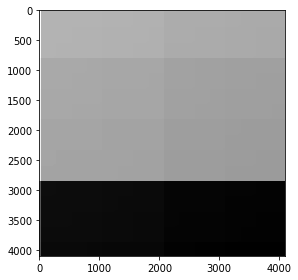

In [60]:
imshow((pic - pic.min()) / (pic - pic.min()).max())

In [17]:
print(patch['gKronFlux'].min(), patch['gKronFlux'].max())
print(patch['rKronFlux'].min(), patch['rKronFlux'].max())
print(patch['yKronFlux'].min(), patch['yKronFlux'].max())
print(patch['iKronFlux'].min(), patch['iKronFlux'].max())
print(patch['zKronFlux'].min(), patch['zKronFlux'].max())

-999.0 0.15659299492835999
-999.0 0.22316999733448006
-999.0 9.17269992828369
-999.0 0.46043100953102095
-999.0 0.9808940291404721


In [33]:
def pic_one_filter(f, patch, pix_matr, size=4096):
    result = np.zeros((size, size), dtype=np.float32)
    for i in range(size):
        for j in range(size):
            pix = pix_matr[i, j]
            if len(patch[patch['pix'] == pix]) == 0:
                continue
            flux = patch[patch['pix'] == pix][f + 'KronFlux'].iloc[0]
            if flux == -999:
                flux = patch[patch['pix'] == pix][f + 'PSFFlux'].iloc[0]
            if flux == -999:
                flux = 0
            result[i, j] = flux
    return result

In [18]:
pix = list(patch['pix'])[0]

In [25]:
pix
patch[patch['pix'] == pix]['gPSFFlux'].iloc[0]

3.5569499345911e-07

In [37]:
gpic = pic_one_filter('g', patch, pic)

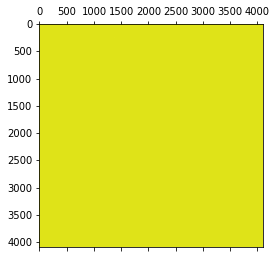

In [38]:
plt.matshow(gpic)

In [40]:
norm_gpic = gpic.copy()

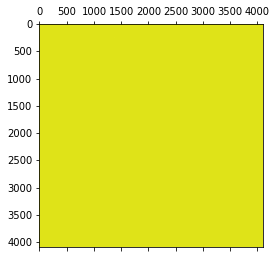

In [41]:
norm_gpic -= norm_gpic.min()
norm_gpic /= norm_gpic.max()
plt.matshow(norm_gpic)

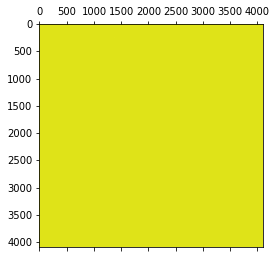

In [42]:
norm_gpic *= 255
plt.matshow(norm_gpic)

In [44]:
from skimage.io import imsave, imshow

In [54]:
gpic.min(), gpic.max()

(-3.13068, 0.156593)

In [55]:
imsave('g.png', gpic / -gpic.min())

/home/rt2122/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [63]:
from tqdm import tqdm_notebook

In [56]:
def pix2dict(matr):
    ans = {}
    for i in range(matr.shape[0]):
        for j in range(matr.shape[1]):
            ans[matr[i, j]] = (i, j)
    return ans

In [88]:
def pic_one_filter_d(f, patch, pix_dict, size=4096):
    result = np.full((size, size), 0, dtype=np.float32)
    for i in tqdm_notebook(range(patch.shape[0])):
        flux = patch[f + 'KronFlux'].iloc[i]
        if flux < 0:
            flux = patch[f + 'PSFFlux'].iloc[i]
        if flux < 0:
            flux = 0
        pix = patch['pix'].iloc[i]
        if pix in pix_dict:
            x, y = pix_dict[pix]
            result[x, y] = flux
    return result

In [61]:
d = pix2dict(pic)

In [89]:
gg = pic_one_filter_d('g', patch, d)

In [70]:
gg -= gg.min()
gg /= gg.max()

In [81]:
gg.min()

-3.13068

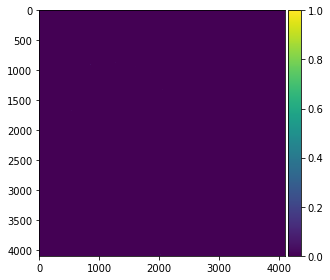

In [91]:
imshow(gg / gg.max())

In [82]:
for f in ['g', 'r', 'i', 'z', 'y']:
    print(patch[patch[f + 'KronFlux'] != -999][f + 'KronFlux'].min(), patch[f + 'KronFlux'].max())
    print(patch[patch[f + 'PSFFlux'] != -999][f + 'PSFFlux'].min(), patch[f + 'PSFFlux'].max())

-0.007105569820851091 0.15659299492835999
-3.1306800842285196 0.11005000025034
-0.0418443009257317 0.22316999733448006
-0.13612499833107 0.307990998029709
-0.0141836004331708 0.46043100953102095
-0.0407322011888027 0.23641499876976002
-0.0320420004427433 0.9808940291404721
-0.13485200703144098 0.4819920063018801
-0.0015653299633413599 9.17269992828369
-0.0891000032424927 0.26932498812675504


In [86]:
imsave('g.png', gg / 4)

/home/rt2122/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: g.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/rt2122/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [92]:
np.count_nonzero(gg)

132914